# Relatório de Análise VIII
## Identificando e Removendo Outliers

In [27]:
%matplotlib inline
import pandas as pd
import matplotlib as plt
plt.rc('figure', figsize=(14,6))

In [28]:
dados = pd.read_csv('dados/aluguel_residencial_2.csv', sep=';')


<AxesSubplot:>

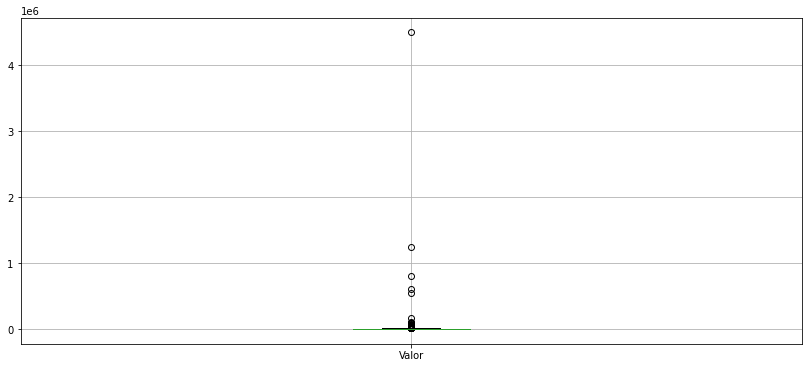

In [29]:
dados.boxplot(['Valor'])
# Os extremos que precisam ser retirados (outliers) estão dificultando a visualização do plot

In [30]:
dados[dados.Valor >= 500000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
7629,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0,9230.77,Apartamento
10636,Casa de Condomínio,Freguesia (Jacarepaguá),4,2,3,163,800000.0,900.0,0.0,4907.98,Casa
12661,Apartamento,Freguesia (Jacarepaguá),2,2,1,150,550000.0,850.0,150.0,3666.67,Apartamento
13846,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0,7485.03,Apartamento
15520,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,0.0,15000.00,Apartamento


In [31]:
valor = dados['Valor']

<img src="dados/quartil.jpg">

In [32]:
Q1 = dados['Valor'].quantile(.25)
Q3 = dados['Valor'].quantile(.75)
IQR = Q3 - Q1


In [33]:
limite_inferior = Q1 - 1.5*IQR
limite_superior = Q3 + 1.5*IQR

In [34]:
limite_superior

11350.0

In [35]:
selecao = (valor >= limite_inferior) & (valor <= limite_superior)
df_new = dados[selecao]

<AxesSubplot:>

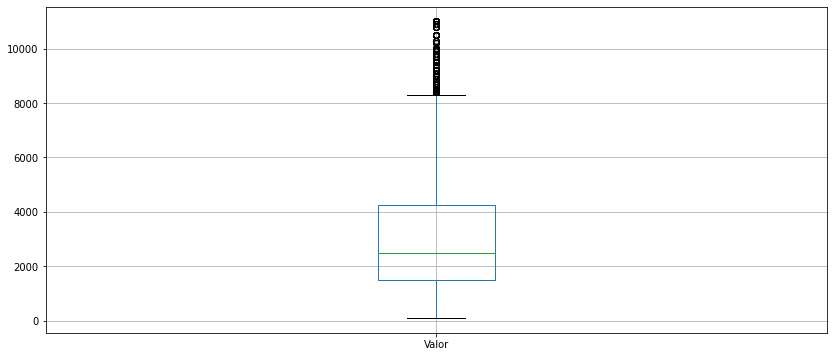

In [36]:
df_new.boxplot(['Valor'])

array([[<AxesSubplot:title={'center':'Valor'}>]], dtype=object)

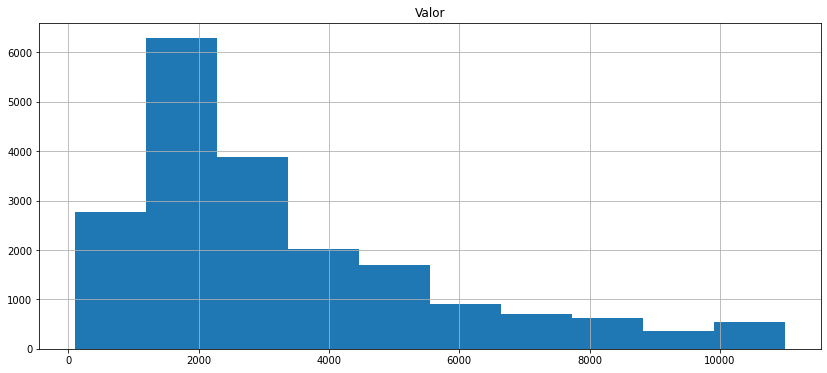

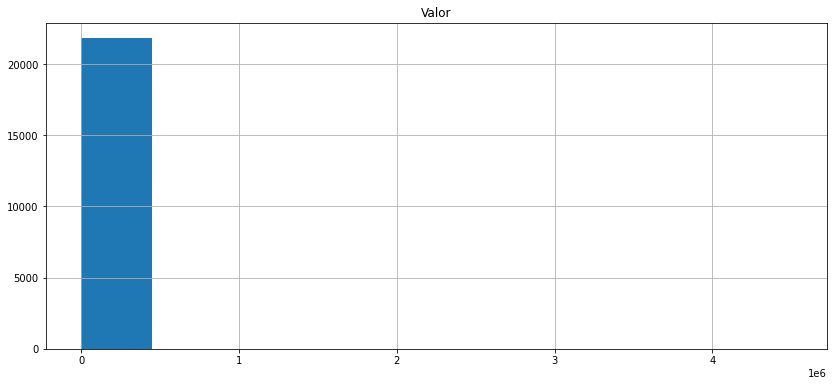

In [37]:
df_new.hist(['Valor'])
dados.hist(['Valor'])

## Identificando e Removendo Outliers (Continuação)
Agora vamos fazer o mesmo, porém separando pelos tipos de imóveis. Assim teremos informação preservada e mais fina

<AxesSubplot:title={'center':'Valor'}, xlabel='Tipo'>

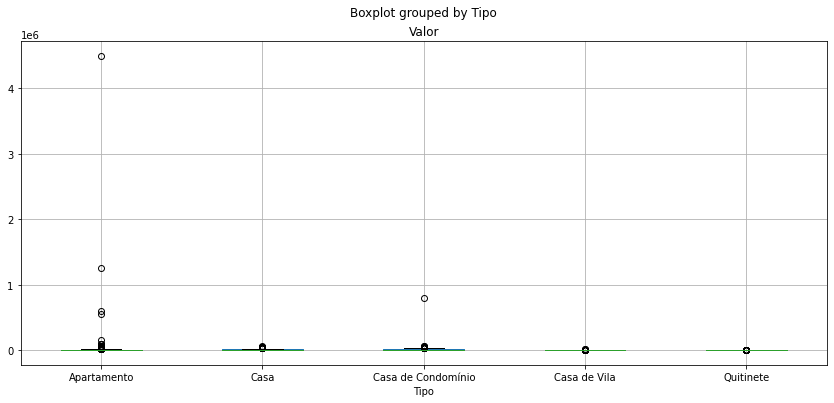

In [38]:

dados.boxplot('Valor', by='Tipo')

In [39]:
grupo_tipo = dados.groupby('Tipo')['Valor']
#Series Groupby

In [40]:

Q1 = grupo_tipo.quantile(0.25)
Q3 = grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5*IIQ
limite_superior = Q3 + 1.5*IIQ

In [41]:
limite_superior

Tipo
Apartamento            9950.0
Casa                  22850.0
Casa de Condomínio    32125.0
Casa de Vila           3375.0
Quitinete              2400.0
Name: Valor, dtype: float64

In [45]:
dados_new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    eh_tipo = dados['Tipo'] == tipo
    eh_dentro_limite = (dados['Valor'] <= limite_superior[tipo]) & (dados['Valor'] >= limite_inferior[tipo])
    selecao = eh_tipo & eh_dentro_limite
    dados_selecao = dados[selecao]
    dados_new = pd.concat([dados_new, dados_selecao])

<AxesSubplot:title={'center':'Valor'}, xlabel='Tipo'>

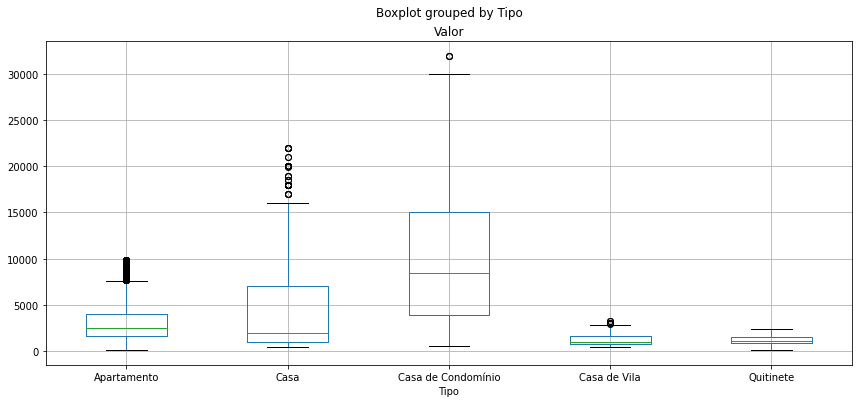

In [47]:
dados_new.boxplot('Valor', by='Tipo')

In [48]:
dados_new.to_csv('dados/aluguel_residencial_sem_outliers.csv', sep=';', index=False)